In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np

In [ ]:
!pip install google-colab

In [9]:
from google.colab.patches import cv2_imshow

**Đọc ảnh và trích xuất các thông tin quan trọng như chiều rộng, cao và số kênh**

In [5]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/image_dog.png')
height, width, channels = image.shape
print(height, width, channels)

700 700 3


**Cơ sở lý thuyết:**
* Một tấm ảnh được cấu tạo từ nhiều điểm ảnh (pixel) và
có thể biểu diễn dưới dạng ma trận kích thước HxW trong đó H là chiều cao ảnh và W là chiều rộng ảnh.
* Màu được cấu tạo từ 3 thành phần chính là RGB (Red, Green, Blue) vì vậy nên để biểu diễn một màu cần xác định 3 thông số RGB của nó. Nên lúc này mỗi pixel cần chứa 3 thông số và có thể biểu diễn như sau Wij=(Rij, Gij, Bij).



**I. Split RGB image to 3 channels**

**Ý tưởng :** Ta tách ảnh màu thành ma trận số sau đó lấy từng giá trị màu riêng biệt để tạo thành ảnh chứa 1 kênh màu.

In [10]:
def split_rgb(image):
    # Chuyển đổi thành mảng numpy
    rgb_image = np.array(image)
    # Tách thành các kênh màu
    red_channel = rgb_image[:,:,0]
    green_channel = rgb_image[:,:,1]
    blue_channel = rgb_image[:,:,2]
    return red_channel, green_channel, blue_channel

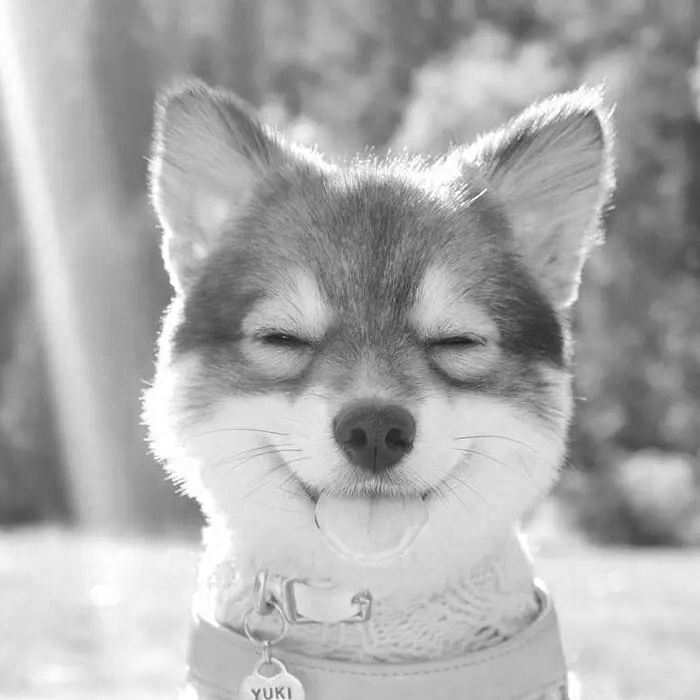

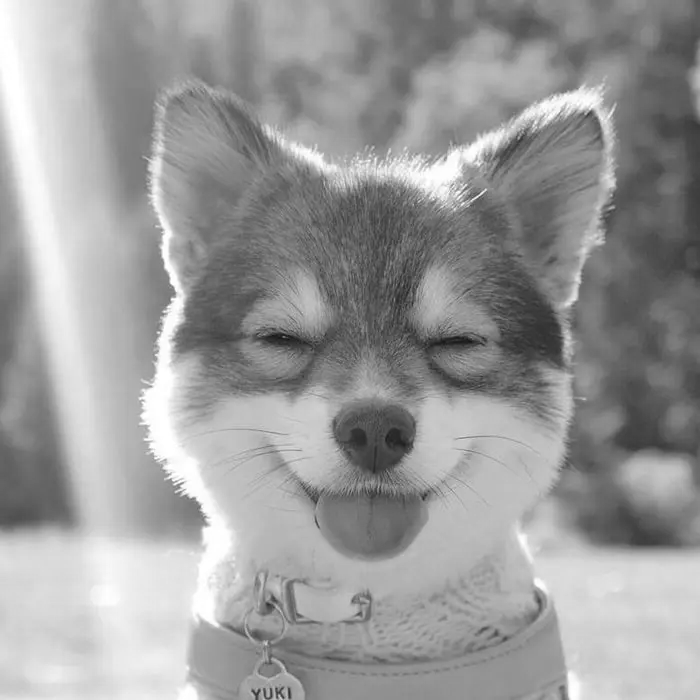

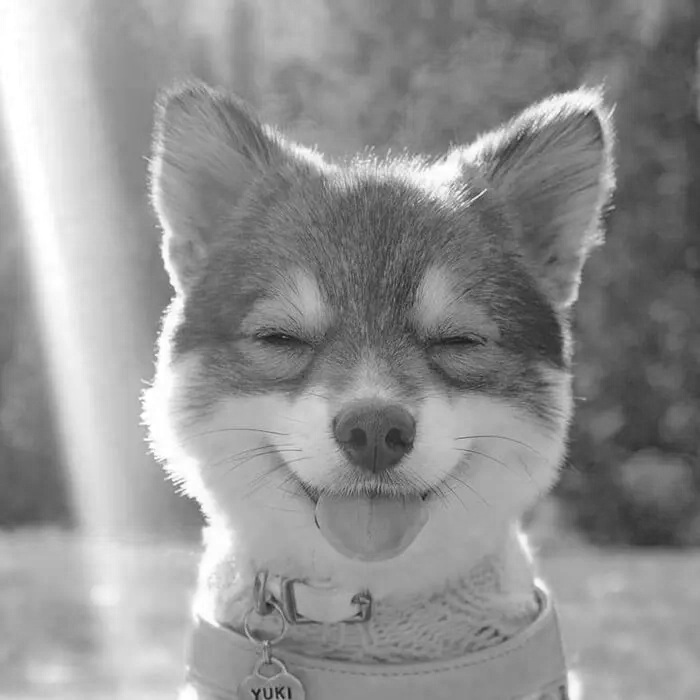

In [13]:
red_channel, green_channel, blue_channel = split_rgb(image)

cv2_imshow(blue_channel)
cv2_imshow(green_channel)
cv2_imshow(red_channel)
cv2.waitKey(10000)
cv2.destroyAllWindows()

 **II. Combine the 3 channels to create a color image**

**Ý tưởng:** Ta gộp 3 giá trị từ các kênh màu vào 1 mảng trống , và như thế mảng sẽ mang đầy đủ thông tin RGB của từng điểm ảnh và tái tạo lại ảnh màu như ban đầu.

In [14]:
def combine_channels(red_channel, green_channel, blue_channel):
    height, width = blue_channel.shape
    color_image = np.zeros((height, width, 3), dtype=np.uint8)
    color_image[:, :, 0] = red_channel
    color_image[:, :, 1] = green_channel
    color_image[:, :, 2] = blue_channel
    return color_image



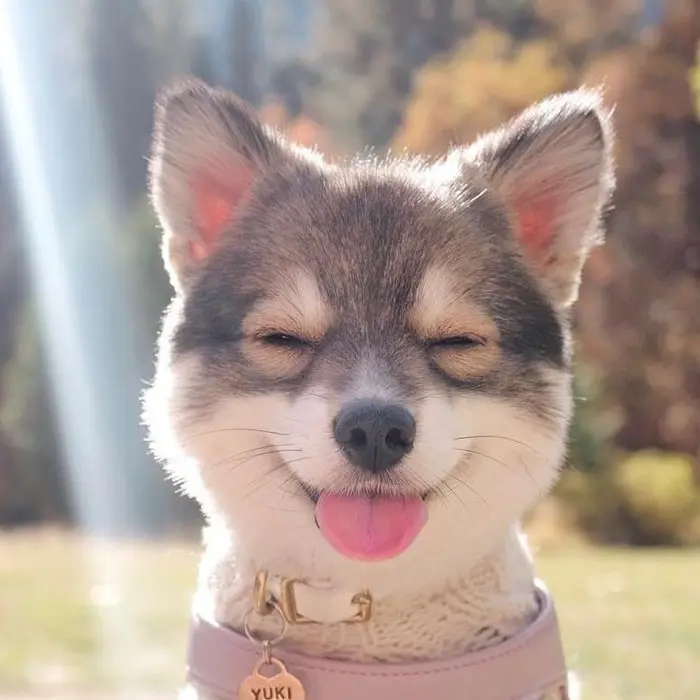

In [15]:
color_images=combine_channels(red_channel, green_channel, blue_channel)
cv2_imshow( color_images)
cv2.waitKey(20000)
cv2.destroyAllWindows()

**III. Nhận Xét**

Như vậy bằng việc hiểu được bản chất và giá trị của pixel của ảnh,
Trong phạm vi bài toán ta có thể tách từ ảnh màu thành từng ảnh với kênh màu R, G, B khác nhau , hoặc gộp 3 kênh màu ấy để thu được ảnh màu như ban đầu.